# Plotagem básica

## Introdução

O Matplotlib permite criar gráficos de linhas, gráficos de dispersão, histogramas, gráficos de barras, gráficos de pizza e outros tipos básicos de gráficos. Você pode plotar dados em 2D e 3D.

A seguir, serão mostrados exemplos de como construir alguns gráficos básicos usando dados do Campeonato Brasileiro entre os anos de 2003 e 2022.

Para mais informações sobre o MatPlotlib, acesse a documentação clicando [aqui](https://matplotlib.org/stable/users/index.html).

O dataset utilizado foi retirado do seguinte [link](https://www.kaggle.com/datasets/regazze/brasileirao-2003-2022?resource=download.).

## Começando

Primeiramente, importaremos as bibliotecas pandas e matplotlib. Em seguida, faremos a leitura do dataset.

In [1]:
# importando bibliotecas
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('./brasileirao.csv') # Lendo arquivo
df.head() # Exibindo o dataframe

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,total_points,percentage_win
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,138,"72,46"
1,2003,2,Santos,87,46,25,12,9,93,60,33,138,"63,04"
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,138,"56,52"
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,138,"53,62"
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,138,"52,9"


## Gráfico de linha

Vamos construir um gráfico de linhas contendo a pontuação ao longo dos anos de alguns times selecionados.

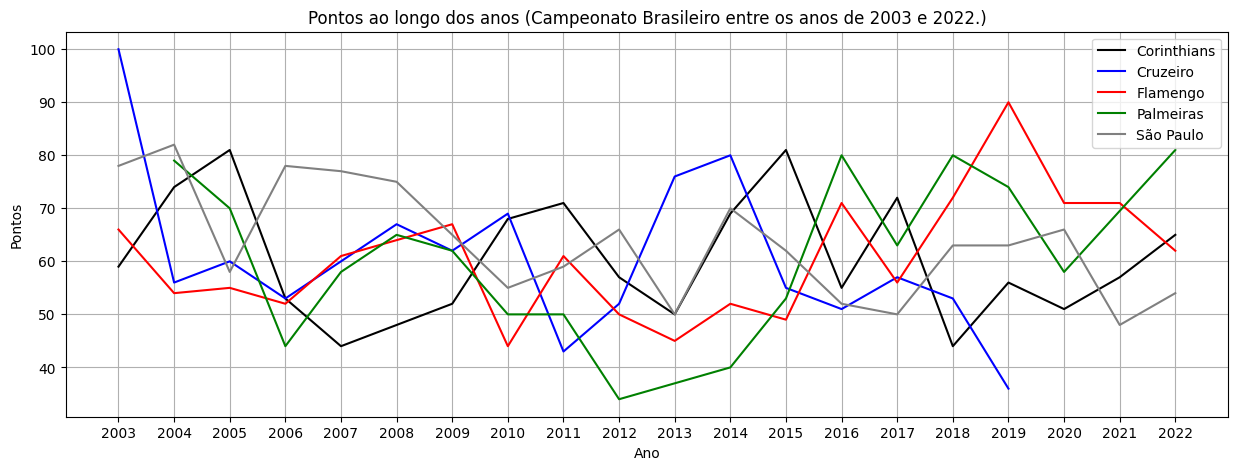

In [2]:
teams = ['Flamengo', 'São Paulo', 'Cruzeiro', 'Corinthians', 'Palmeiras'] # Times selecionados
df_teams = df[df['team'].isin(teams)] # Filtra o dataframe original, mantendo apenas as linhas dos times selecionados

# Mapeando cores para os times
team_colors = {
    'Flamengo': 'red',
    'Cruzeiro': 'blue',
    'Corinthians': 'black',
    'Palmeiras': 'green',
    'São Paulo': 'gray'
}

# Definindo tamanho do gráfico
plt.figure(figsize=(15, 5))

# Itera sobre cada time presente no dataframe filtrado
for team, data in df_teams.groupby('team'):
    color = team_colors.get(team, 'purple')  # Obtém a cor do dicionário, caso a cor não esteja definida, é usado a cor 'purple'.
    plt.plot(data['year'], data['points'], label=team, color=color)

# Personalizando gráfico
plt.xlabel('Ano')
plt.ylabel('Pontos')
plt.title('Pontos ao longo dos anos (Campeonato Brasileiro entre os anos de 2003 e 2022.)')
plt.legend()
plt.grid(True)
    
# Define os rótulos do eixo X com todos os anos
plt.xticks(range(int(df['year'].min()), int(df['year'].max())+1, 1))

plt.show()

## Gráfico de barras

Agora, iremos criar um gráfico de barras que apresenta os 20 times que mais venceram partidas no Campeonato Brasileiro entre os anos de 2003 e 2022.

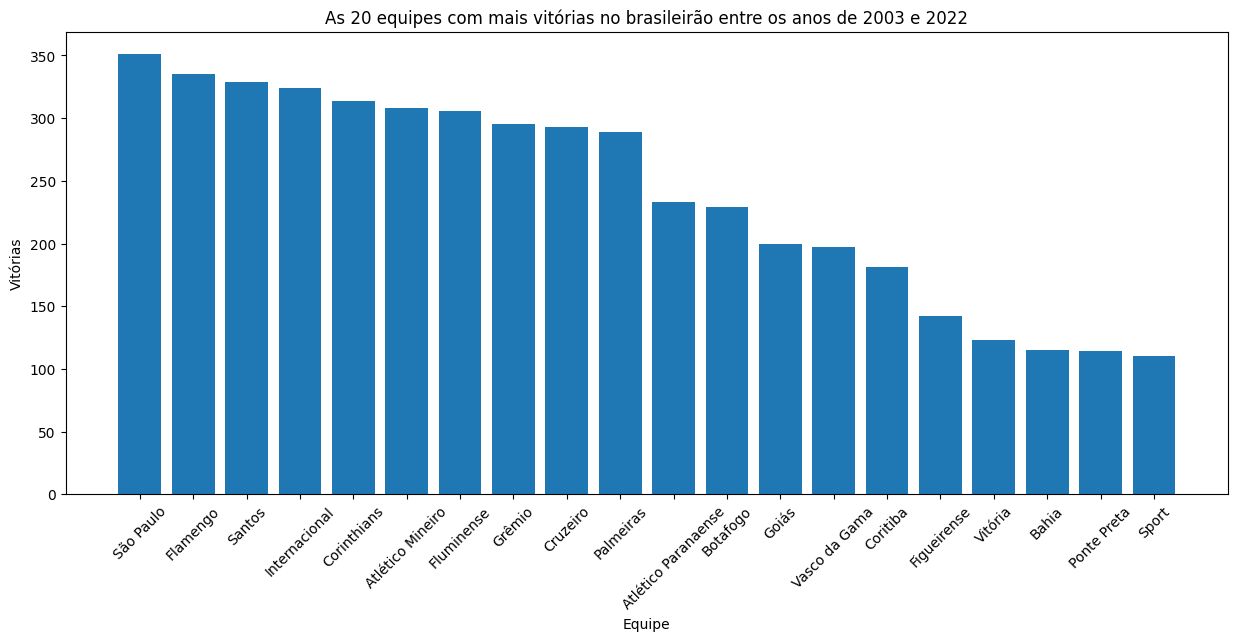

In [3]:
# Agrupa os dados por equipe e calcula o total de vitórias
total_victories = df.groupby('team')['victories'].sum().sort_values(ascending=False)

# Seleciona as 20 equipes com mais vitórias
top_20_teams = total_victories.head(20)

plt.figure(figsize=(15, 6))

# Cria o gráfico de barras
plt.bar(top_20_teams.index, top_20_teams.values)

plt.xlabel('Equipe')
plt.ylabel('Vitórias')
plt.title('As 20 equipes com mais vitórias no brasileirão entre os anos de 2003 e 2022')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização

plt.show()

## Gráfico de pizza

Para construir o gráfico de pizza, foi escolhido o time do Flamengo para apresentar o percentual de vitórias, derrotas e empates no Campeonato Brasileiro entre os anos de 2003 e 2022.

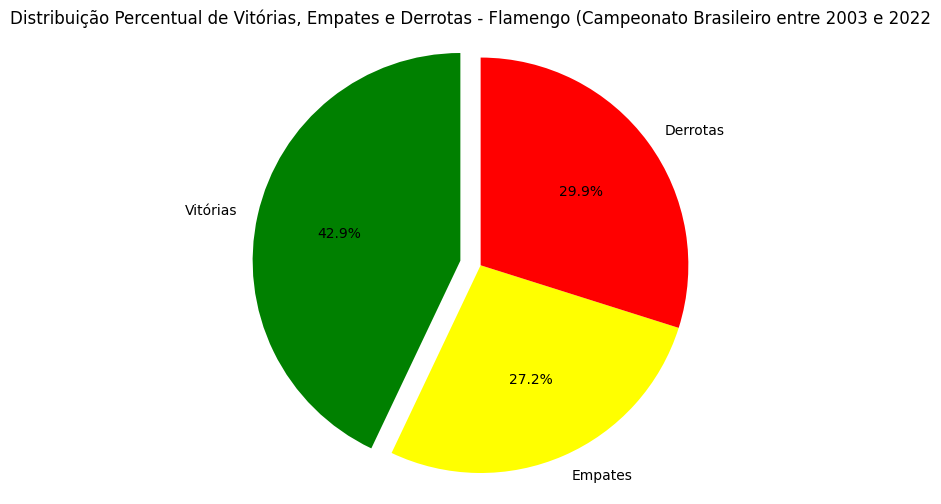

In [4]:
# Filtra os dados apenas para o time do Flamengo
df_flamengo = df[df['team'] == 'Flamengo']

# Calcula a contagem de vitórias, empates e derrotas para o Flamengo
victories_count = df_flamengo['victories'].sum()
draws_count = df_flamengo['draws'].sum()
losses_count = df_flamengo['losses'].sum()

# Calcula a porcentagem de vitórias, empates e derrotas para o Flamengo
total_games = victories_count + draws_count + losses_count
victories_percentage = (victories_count / total_games) * 100
draws_percentage = (draws_count / total_games) * 100
losses_percentage = (losses_count / total_games) * 100

# Cria o gráfico de pizza
labels = ['Vitórias', 'Empates', 'Derrotas']
sizes = [victories_percentage, draws_percentage, losses_percentage]
colors = ['green', 'yellow', 'red']
explode = (0.1, 0, 0)  # Destaca a primeira fatia (vitórias)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Mantém a proporção dos eixos

plt.title('Distribuição Percentual de Vitórias, Empates e Derrotas - Flamengo (Campeonato Brasileiro entre 2003 e 2022')
plt.show()

## Exportação e salvamento de gráficos

Para salvar a imagem do gráfico, basta chamar a função savefig. Exemplo:

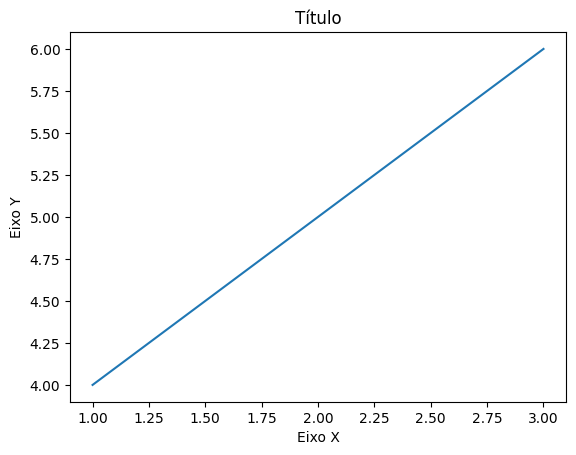

In [5]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.plot(x, y)
plt.title('Título')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.savefig('./grafico.png')  # Caminho, nome e formato para salvar a imagem.

plt.show()
